In [29]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib_venn import venn3

In [2]:
figures_dir = '/Users/plutzer/majlab/figures'

In [3]:
combined_pg = pd.read_csv('/Users/plutzer/Box/CellBio-MajorLab/Users/Rotation Students/Isaac/PG files/CK1g_combined-proteinGroups.txt',delimiter = '\t')
seperate_pg = pd.read_csv('/Users/plutzer/Box/CellBio-MajorLab/Users/Rotation Students/Isaac/PG files/CK1g_seperate-proteinGroups.txt',delimiter = '\t')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (223,224) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (30,31,32,69,70,71,93,94,95,117,118,119,141,142,143,165,166,167,189,190,191) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


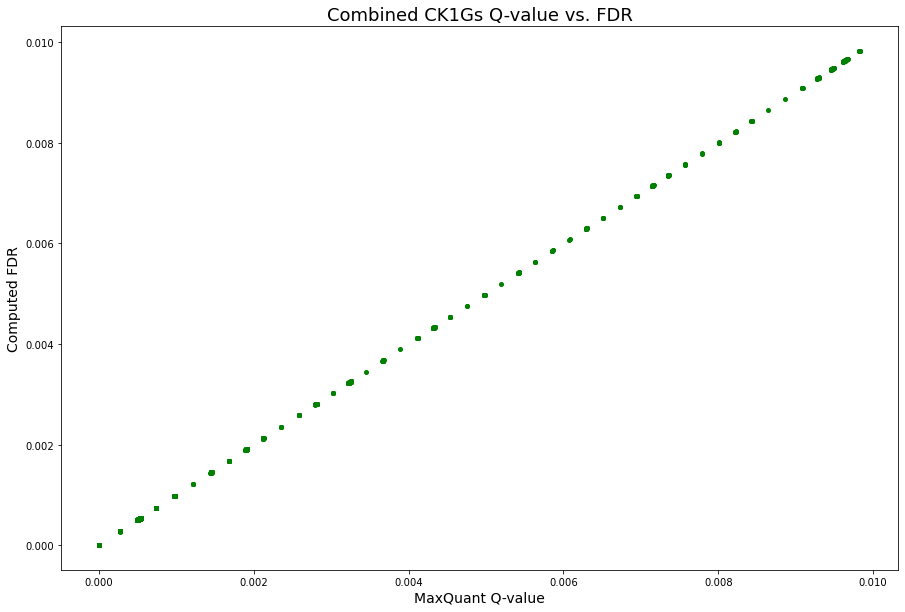

In [22]:
# First figure: correlation of q-value and FDR for combined pg
fig, ax = plt.subplots(figsize = (15,10))
plt.scatter(combined_pg['Q-value'],combined_pg['FDR'],s=16,c='green')
ax.set_title('Combined CK1Gs Q-value vs. FDR',size = 18)
ax.set_ylabel('Computed FDR',size = 14)
ax.set_xlabel('MaxQuant Q-value',size = 14)
plt.savefig(figures_dir + '/combined_CK1Gs_qvsFDR.png',dpi = 256)

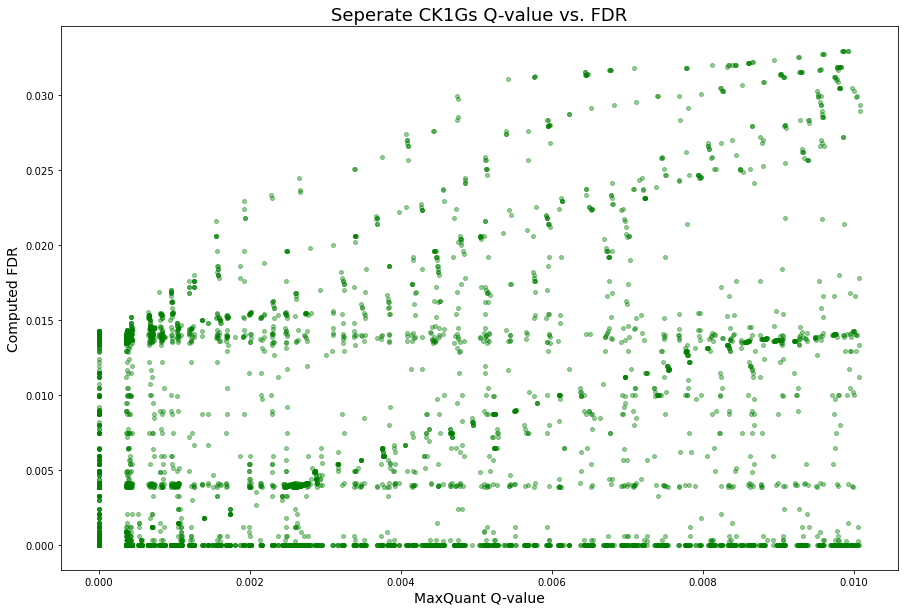

In [27]:
# Repeat with the seperated file
fig, ax = plt.subplots(figsize = (15,10))
plt.scatter(seperate_pg['Q-value'],seperate_pg['FDR'],s=16,c='green',alpha = 0.4)
ax.set_title('Seperate CK1Gs Q-value vs. FDR',size = 18)
ax.set_ylabel('Computed FDR',size = 14)
ax.set_xlabel('MaxQuant Q-value',size = 14)
plt.savefig(figures_dir + '/seperate_CK1Gs_qvsFDR.png',dpi = 256)

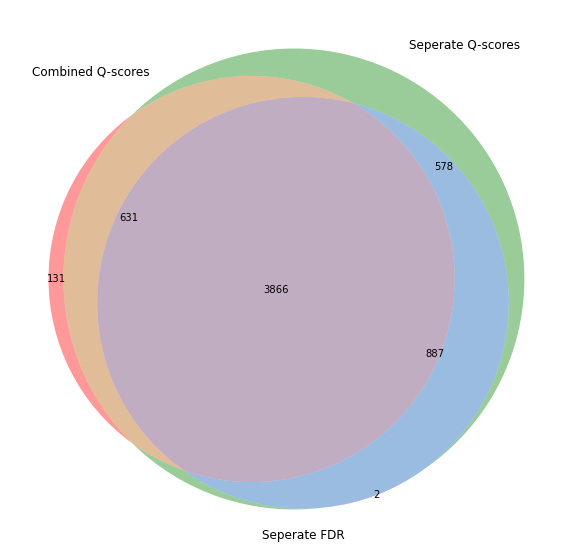

In [45]:
#If we apply a 1% FDR cutoff, what groups stay vs. what groups go
combined = combined_pg[combined_pg['Q-value'] <= 0.01]['Protein IDs'].unique() #Change these to gene names
seperate_q = seperate_pg[seperate_pg['Q-value'] <= 0.01]['Protein IDs'].unique()
seperate_FDR = seperate_pg[seperate_pg['FDR'] <= 0.01]['Protein IDs'].unique()
all3 = len(list(set(combined).intersection(seperate_q).intersection(seperate_FDR)))
com_and_q = len(list(set(combined).intersection(seperate_q)))-all3
com_and_f = len(list(set(combined).intersection(seperate_FDR)))-all3
q_and_f = len(list(set(seperate_q).intersection(seperate_FDR)))-all3
fig, ax = plt.subplots(figsize = (15,10))
threshold_venn = venn3(subsets = (len(combined)-com_and_q-com_and_f-all3,
                        len(seperate_q)-com_and_q-q_and_f-all3,
                        com_and_q,
                        len(seperate_FDR)-com_and_f-q_and_f-all3,
                        com_and_f,
                        q_and_f,
                        all3),
                       set_labels = ('Combined Q-scores','Seperate Q-scores','Seperate FDR'))
plt.savefig(figures_dir + '/CK1Gs_FDR_threshold_venn.png')

In [46]:
print([len(combined)-com_and_q-com_and_f-all3,
                        len(seperate_q)-com_and_q-q_and_f-all3,
                        com_and_q,
                        len(seperate_FDR)-com_and_f-q_and_f-all3,
                        com_and_f,
                        q_and_f,
                        all3])

[131, 578, 631, 2, 0, 887, 3866]


In [44]:
len(seperate_pg['Protein IDs'].unique())

5969

In [87]:
list(np.setdiff1d(combined,seperate_q))

['CON__ENSEMBL:ENSP00000377550;sp|P13646|K1C13_HUMAN;CON__P13646-1;sp|P35900|K1C20_HUMAN;CON__P35900;sp|Q9C075|K1C23_HUMAN;CON__Q9C075',
 'CON__P05787;sp|P05787|K2C8_HUMAN;CON__H-INV:HIT000016045',
 'CON__Q14525;sp|Q14525|KT33B_HUMAN;CON__Q497I4',
 'CON__Q3SX09',
 'CON__Q9QWL7',
 'REV__sp|O60664|PLIN3_HUMAN',
 'REV__sp|O95602|RPA1_HUMAN;REV__sp|O14802|RPC1_HUMAN',
 'REV__sp|P42694|HELZ_HUMAN',
 'REV__sp|Q63HN8|RN213_HUMAN',
 'REV__sp|Q8N1P7|CRBG2_HUMAN',
 'REV__sp|Q8NE71|ABCF1_HUMAN',
 'REV__sp|Q8NEZ4|KMT2C_HUMAN',
 'REV__sp|Q8NF91|SYNE1_HUMAN',
 'REV__sp|Q8WXI7|MUC16_HUMAN',
 'REV__sp|Q9H0D2|ZN541_HUMAN',
 'REV__sp|Q9P0W8|SPAT7_HUMAN',
 'REV__sp|Q9UQG0|POK11_HUMAN;REV__sp|P10266|POK10_HUMAN;REV__sp|P63135|POK7_HUMAN;REV__sp|Q9QC07|POK18_HUMAN;REV__sp|P63136|POK25_HUMAN;REV__sp|Q9BXR3|POK6_HUMAN;REV__sp|P63133|POK8_HUMAN;REV__sp|P63132|PO113_HUMAN;REV__sp|Q9WJR5|POK19_HUMAN',
 'REV__sp|Q9Y6C2|EMIL1_HUMAN',
 'sp|A6NKT7|RGPD3_HUMAN',
 'sp|A8CG34|P121C_HUMAN;sp|Q6PJE2|POZP3_HUMAN;sp|A6NF0

In [88]:
list(np.setdiff1d(seperate_FDR,combined))

['CON__ENSEMBL:ENSBTAP00000001528;sp|Q15811|ITSN1_HUMAN',
 'CON__ENSEMBL:ENSBTAP00000024146',
 'CON__ENSEMBL:ENSP00000377550;sp|P13646|K1C13_HUMAN;CON__P13646-1',
 'CON__ENSEMBL:ENSP00000377550;sp|P13646|K1C13_HUMAN;CON__P13646-1;CON__P08730-1;sp|Q99456|K1C12_HUMAN;CON__Q99456',
 'CON__ENSEMBL:ENSP00000377550;sp|P13646|K1C13_HUMAN;CON__P13646-1;sp|P35900|K1C20_HUMAN;CON__P35900;CON__Q9D312;sp|Q8N1A0|KT222_HUMAN;CON__Q8N1A0',
 'CON__P02533;sp|P02533|K1C14_HUMAN;CON__Q6IFX2',
 'CON__P02538;sp|P02538|K2C6A_HUMAN;CON__Q8VED5;sp|Q9NSB2|KRT84_HUMAN;CON__P08729;CON__Q3KNV1;sp|P08729|K2C7_HUMAN;CON__Q9NSB2;CON__Q6ISB0;CON__P19013;sp|P19013|K2C4_HUMAN;CON__Q9DCV7;CON__P07744;sp|P78386|KRT85_HUMAN;sp|P14136|GFAP_HUMAN;CON__P78386;CON__Q14533;sp|P78385|KRT83_HUMAN;CON__Q6NT21;CON__P78385;sp|O43790|KRT86_HUMAN;CON__O43790;CON__Q61726;sp|Q14533|KRT81_HUMAN',
 'CON__P02769;sp|P02768|ALBU_HUMAN;CON__P02768-1',
 'CON__P08727;sp|P08727|K1C19_HUMAN;CON__P19001',
 'CON__P08779;sp|P08779|K1C16_HUMAN;CON__

In [52]:
### What???

In [111]:
#OK moving on to the SAINT output files...
combined_SAINT = pd.read_csv('/Users/plutzer/Box/CellBio-MajorLab/Users/Rotation Students/Isaac/SAINT outputs/CKs_cut_combined_CompPASS_SAINT.csv')
seperate_SAINT = pd.read_csv('/Users/plutzer/Box/CellBio-MajorLab/Users/Rotation Students/Isaac/SAINT outputs/CKs_cut_seperate_CompPASS_SAINT.csv')

In [117]:
#Look at differences in the sets of interacting proteins...
combined_interactions = combined_SAINT[combined_SAINT['SaintScore'] > 0.95]
seperate_interactions = seperate_SAINT[seperate_SAINT['SaintScore'] > 0.95]
combined_ints_list = []
for row in range(len(combined_interactions)):
    combined_ints_list.append(combined_interactions.iloc[row]['Bait'] + " + " + combined_interactions.iloc[row]['Prey'])
seperate_ints_list = []
for row in range(len(seperate_interactions)):
    seperate_ints_list.append(seperate_interactions.iloc[row]['Bait'] + " + " + seperate_interactions.iloc[row]['Prey'].split('gene_')[1])

In [118]:
# Find the set of interactions exclusive to the combined dataset
len(np.setdiff1d(combined_ints_list,seperate_ints_list))

274

In [119]:
# Find the set of interactions exclusive to the seperate dataset
len(np.setdiff1d(seperate_ints_list,combined_ints_list))

1140

In [122]:
len(np.unique(combined_ints_list))

395

In [121]:
len(np.unique(seperate_ints_list))

1261

In [106]:
len(seperate_ints_list)

1264